In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import mne
import pandas as pd

In [2]:
from mne.io import  read_raw_edf

In [3]:
## It can be useful to get the data from gdrive
#from google.colab import drive
#drive.mount ('/gdrive')
#cd /gdrive/drive/MyDrive/EDFfiles
fname = 'chb03_03.edf'
raw =mne.io.read_raw_edf(fname, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb03_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/1783736661.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(fname, preload=True)


In [4]:
raw_downsampled = raw.copy().resample(sfreq=128)

Effective window size : 8.000 (s)
Effective window size : 16.000 (s)


/Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/.venv/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/.venv/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


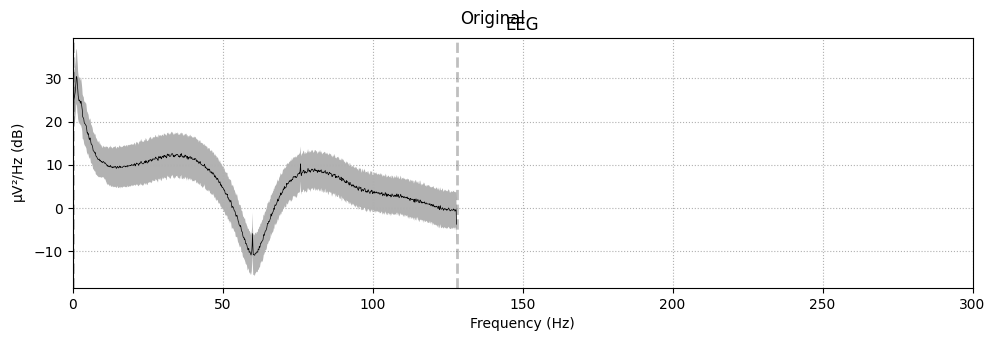

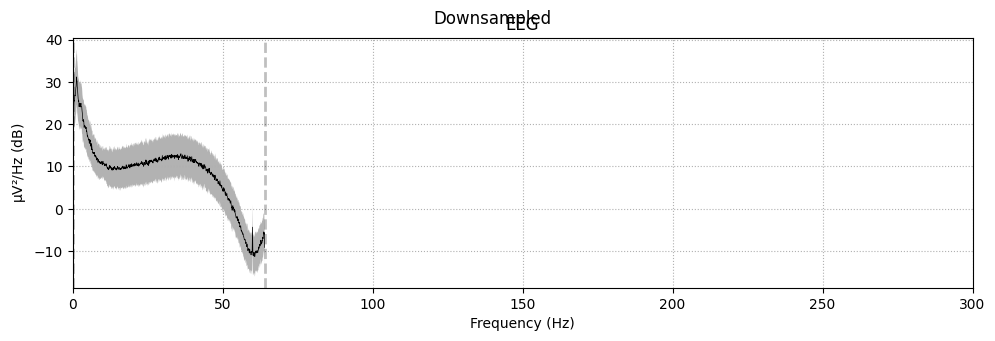

In [5]:
for data, title in zip([raw, raw_downsampled], ["Original", "Downsampled"]):
    fig = data.compute_psd().plot(average=True, picks="data", exclude="bads")
    fig.subplots_adjust(top=0.9)
    fig.suptitle(title)
    plt.setp(fig.axes, xlim=(0, 300))

In [6]:
raw_downsampled

<RawEDF | chb03_03.edf, 23 x 460800 (3600.0 s), ~80.9 MB, data loaded>

In [7]:
raw_downsampled['T7-P7'][0]

array([[ 4.12110027e-05, -5.30526479e-06,  3.02302594e-06, ...,
        -1.25616247e-05,  1.17467090e-05,  1.27485819e-05]])

In [8]:
raw['T7-P7'][0]

array([[4.12210012e-05, 1.95360195e-07, 1.95360195e-07, ...,
        1.73870574e-05, 1.23076923e-05, 2.93040293e-06]])

In [50]:
data_dowsampled = raw_downsampled.get_data
df_down = raw_downsampled.to_data_frame()

In [98]:
data = raw.get_data
df = raw.to_data_frame()

c:\Users\anita\Documents\bootcamp\ai-seizure-detectives\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


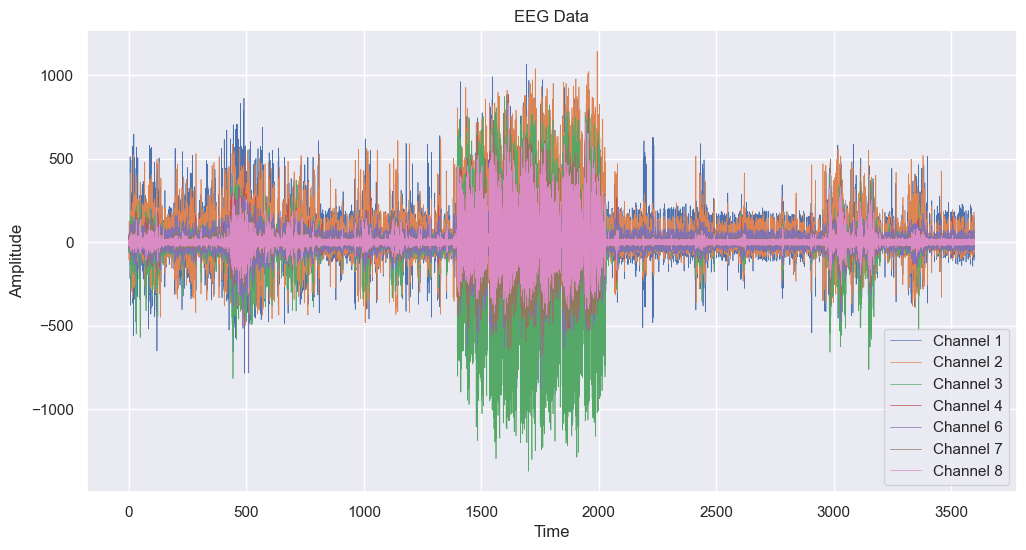

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Plot the line plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(x="time", y=df.columns[1], data=df, label="Channel 1",linewidth=0.5)
sns.lineplot(x="time", y=df.columns[2], data=df, label="Channel 2",linewidth=0.5)
sns.lineplot(x="time", y=df.columns[3], data=df, label="Channel 3", linewidth=0.5)
sns.lineplot(x="time", y=df.columns[4], data=df, label="Channel 4",linewidth=0.5)
#sns.lineplot(x="time", y=df.columns[5], data=df, label="Channel 5",linewidth=0.5)
sns.lineplot(x="time", y=df.columns[6], data=df, label="Channel 6",linewidth=0.5)
sns.lineplot(x="time", y=df.columns[7], data=df, label="Channel 7",linewidth=0.5)
sns.lineplot(x="time", y=df.columns[8], data=df, label="Channel 8",linewidth=0.5)

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("EEG Data")

plt.legend()

plt.show()

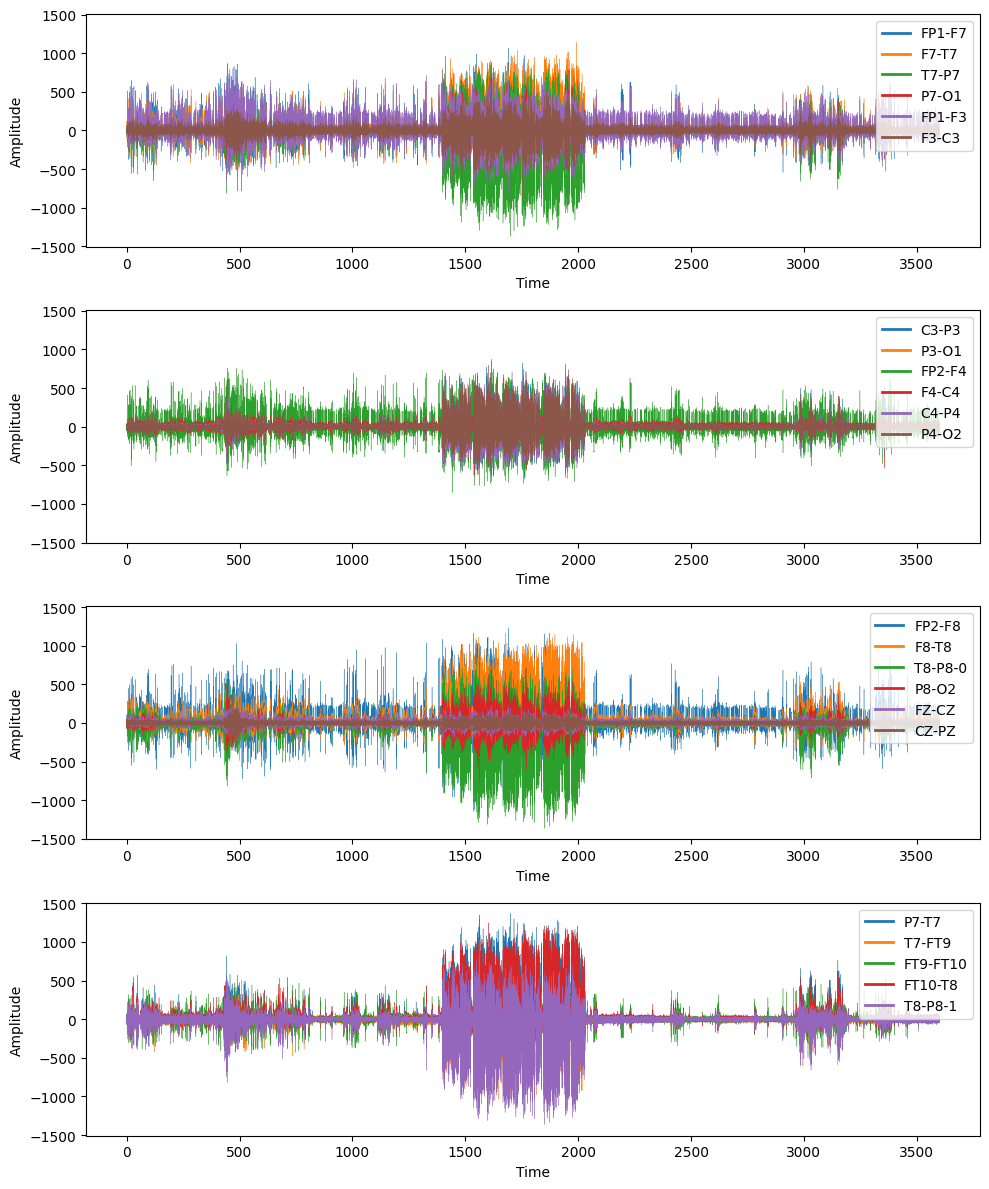

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12), sharey=True)

#channels = ["Channel1", "Channel2", "Channel3", "Channel4", "Channel5", "Channel6"]
channels = df.columns[1:]

for i, ax in enumerate(axes):
    start_index = i * 6
    end_index = (i + 1) * 6
    if len(channels) < end_index:
        end_index = len(channels)
    channels_to_plot = channels[start_index:end_index]
    
    for channel in channels_to_plot:
        sns.lineplot(x="time", y=channel, data=df, ax=ax, linewidth=0.25, label=channel)

    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")

    leg= ax.legend(loc="upper right")  
        # change the line width for the legend
    for line in leg.get_lines():
        line.set_linewidth(2.0)

plt.tight_layout()
plt.show()

In [23]:
!pip install scipy

In [8]:
import numpy as np
from scipy import signal

<Axes: xlabel='time', ylabel='T7-P7'>

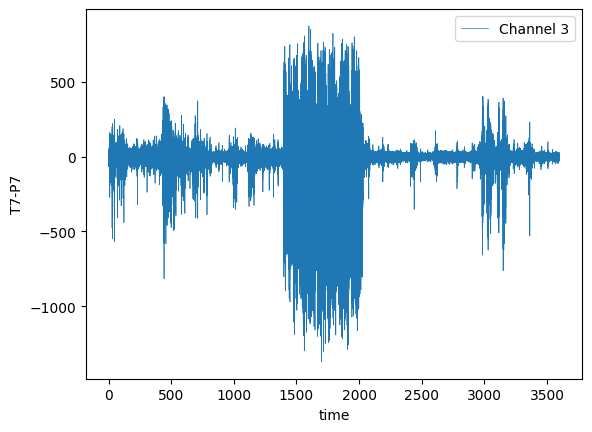

In [42]:
sns.lineplot(x="time", y=df.columns[3], data=df, label="Channel 3", linewidth=0.5)

In [108]:
test = df[["time", "T7-P7"]].copy()
test_down = df_down[["time", "T7-P7"]].copy()

In [110]:
data = test
data_downs = test_down
q = 2 ## factor of resampling
df_decimate = signal.decimate(data['T7-P7'], q)

In [117]:
new_decimate = np.array(data_downs['T7-P7'])

In [118]:
#downsampled_df = pd.DataFrame({'time': df['time'][::q], 'downsampled_eeg': df_decimate})
downsampled_df_new = pd.DataFrame({'time': df['time'][::q], 'downsampled_eeg': new_decimate})

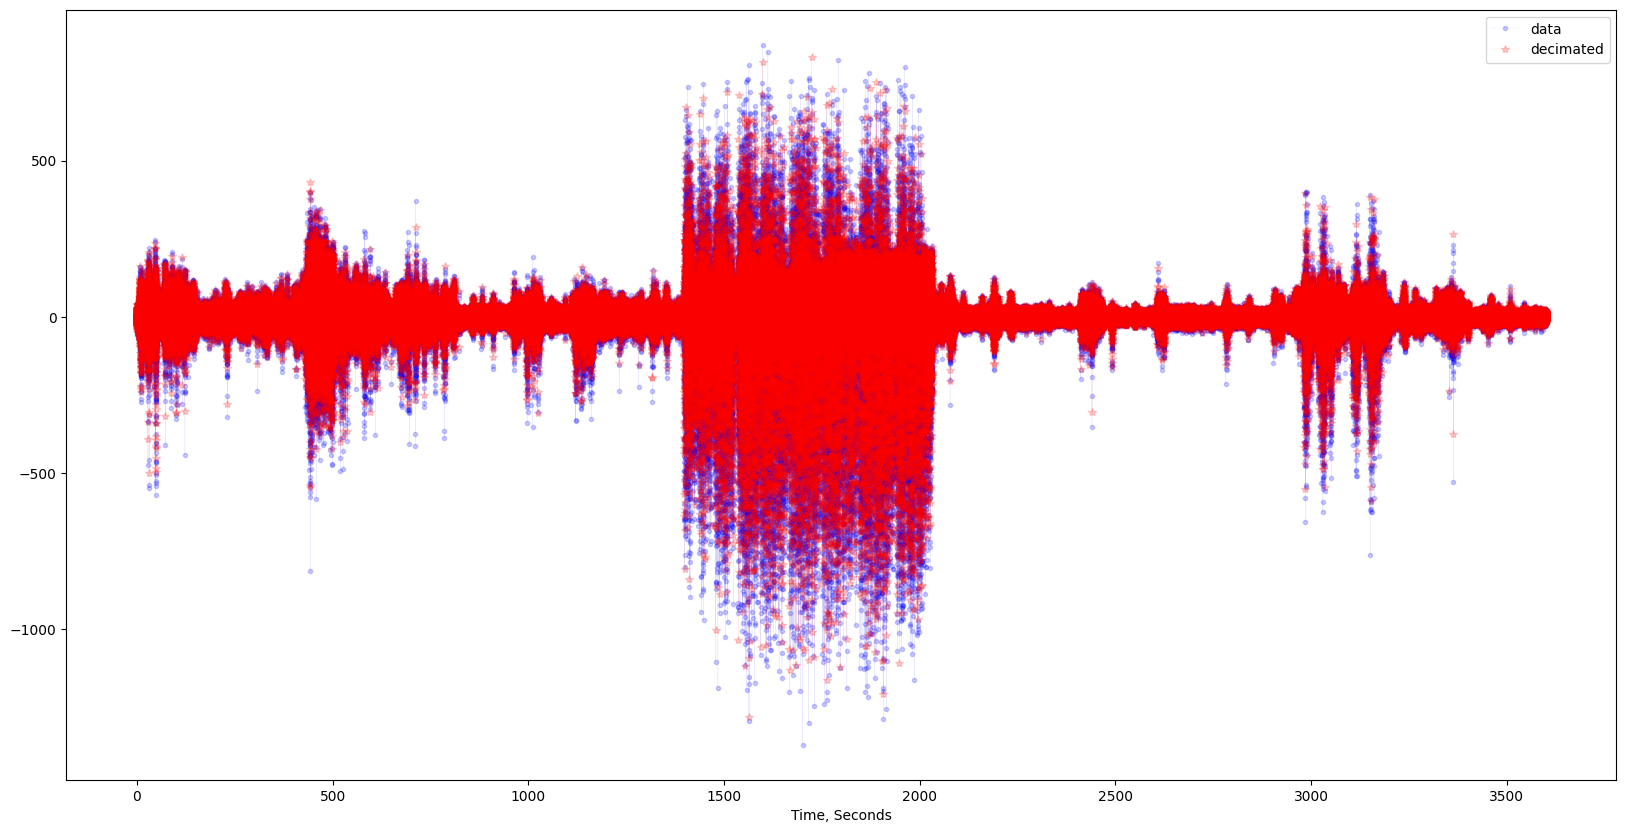

In [121]:
plt.figure(figsize=(20, 10)) 
plt.plot(df['time'], df[df.columns[3]], '.-', color='blue', label='data', linewidth=0.15,alpha=0.2)
plt.plot(downsampled_df_new['time'], downsampled_df_new['downsampled_eeg'], '*-', color='red', label='decimated', linewidth=0.15, alpha=0.2)
plt.xlabel('Time, Seconds')
plt.legend(['data', 'decimated'], loc='best')
plt.show()


In [23]:
fname = 'eeg1.edf'
raw =mne.io.read_raw_edf(fname, preload=True)

Extracting EDF parameters from c:\Users\anita\Documents\bootcamp\ai-seizure-detectives\eeg1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1790207  =      0.000 ...  6992.996 secs...


In [9]:
import os
import pandas as pd
from mne.io import  read_raw_edf

In [49]:
folder_name = 1
folder_name = f'chb{folder_name:02d}'  # Format the folder name as ch01, ch02, etc.
folder_path = os.path.join(folder_name)  # Create the full path to the folder
file_names = [f for f in os.listdir(folder_path) if f.endswith('.edf')]
file_path = os.path.join(folder_path, file_names[0])
raw =mne.io.read_raw_edf(file_path, preload=True)
raw_downsampled = raw.copy().resample(sfreq=128)
raw_downsampled.info = raw.info
filename_data = [file_names[0]] * raw_downsampled.n_times  # Create a list with the same filename for each time point
filename_info = mne.create_info(['filename'], sfreq=raw_downsampled.info['sfreq'], ch_types=['misc'])
filename_data
filename_raw = mne.io.RawArray([filename_data], filename_info)

Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_42.edf...
EDF file detected


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3630955605.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


['chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf',
 'chb01_42.edf

In [50]:
dataframes = []  # List to store individual DataFrames
folder_name = 1
folder_name = f'chb{folder_name:02d}'  # Format the folder name as ch01, ch02, etc.
folder_path = os.path.join(folder_name)  # Create the full path to the folder

        # List the files in the folder
file_names = sorted([f for f in os.listdir(folder_path) if f.endswith('.edf')])

        # Read each file into a DataFrame and append to the list
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    raw =mne.io.read_raw_edf(file_path, preload=True)
    raw_downsampled = raw.copy().resample(sfreq=128)
    raw_downsampled.info = raw.info
    df = raw_downsampled.to_data_frame()
    df['recname']= file_name
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
final_dataframe = pd.concat(dataframes, ignore_index=True)
#final_dataframe2 = mne.concatenate_raws(dataframes, preload=True)




Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 681727  =      0.000 ...  2662.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 595199  =      0.000 ...  2324.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153599  =      0.000 ...   599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /Users/anabroggini/Documents/bootcamp/ai-seizure-detectives/chb01/chb01_46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/rc/97bvm7z97gd87g90vfhmcrq00000gn/T/ipykernel_3421/3077768424.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw =mne.io.read_raw_edf(file_path, preload=True)


In [51]:
final_dataframe.head(10000000)

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,recname
0,0.000000,-145.889824,-104.437950,-42.712763,-33.231272,-170.898152,-110.662484,11.982817,-56.693821,-139.224010,...,44.764205,74.665696,-106.011537,84.636952,43.103484,-57.184707,-264.745427,94.719394,44.764205,chb01_01.edf
1,0.003906,19.998681,14.586589,5.942093,5.114176,23.455757,15.226859,-1.495469,8.265635,19.049821,...,-5.903085,-11.423631,14.619662,-11.367358,-5.551373,7.423304,37.449772,-12.575222,-5.903085,chb01_01.edf
2,0.007812,-10.400608,-7.840311,-2.702939,-2.982295,-12.495403,-8.041283,1.278082,-4.729659,-9.780279,...,3.634643,8.669002,-7.695286,6.598238,3.093659,-2.615871,-22.604027,6.888621,3.634643,chb01_01.edf
3,0.011719,7.521448,2.545940,4.279262,1.486770,7.968614,5.961491,-0.573553,3.144477,7.997345,...,-2.189232,2.133745,4.962829,-4.438937,-3.888542,5.468633,12.280984,-4.141289,-2.189232,chb01_01.edf
4,0.015625,-6.548636,-2.030466,-4.010286,0.332089,-6.684477,-4.638781,-0.011514,-1.049334,-5.965863,...,2.918519,-8.928768,-4.007684,3.505916,4.401006,-7.245550,-5.458360,4.351446,2.918519,chb01_01.edf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,1730.980469,29.773604,60.922365,55.100511,35.780075,27.043868,35.122101,71.474774,48.078632,60.043500,...,8.034327,127.614269,19.842632,127.952823,-54.709791,-42.911334,-25.033224,-16.468075,8.034327,chb01_22.edf
9999996,1730.984375,28.587536,54.312303,47.063452,30.288569,27.487945,26.191004,56.206951,50.315194,40.030273,...,21.015351,120.134249,13.593908,110.505724,-46.672732,-38.107510,-29.156235,-32.690628,21.015351,chb01_22.edf
9999997,1730.988281,16.986188,53.304649,38.822428,23.472915,14.082041,14.585211,50.420824,53.450721,29.066329,...,33.108287,104.886583,3.020946,93.810198,-38.431708,-46.779697,-14.076983,-57.220958,33.108287,chb01_22.edf
9999998,1730.992188,19.888825,38.730735,36.085199,13.864182,15.530335,4.107343,38.590760,50.698586,18.166221,...,55.872530,93.959330,3.143219,84.124483,-35.694479,-26.464945,-25.550662,-81.920414,55.872530,chb01_22.edf


In [ ]:
import os
import pandas as pd
from mne.io import  read_raw_edf

def read_files_into_dataframe():
    dataframes = []  # List to store individual DataFrames

    # Loop through the folders and files
    for folder_name in range(1, 11):  # Assumes folders are named ch01 to ch10
        folder_name = f'ch{folder_name:02d}'  # Format the folder name as ch01, ch02, etc.
        folder_path = os.path.join(folder_name)  # Create the full path to the folder

        # List the files in the folder
        file_names = [f for f in os.listdir(folder_path) if f.endswith('.edf')]

        # Read each file into a DataFrame and append to the list
        for file_name in file_names:
            file_path = mne.io.path.join(folder_path, file_name)
            raw =mne.io.read_raw_edf(file_name, preload=True)
            raw_downsampled = raw.copy().resample(sfreq=128)
            df = raw_downsampled.to_data_frame()
            dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    final_dataframe = pd.concat(dataframes, ignore_index=True)

    return final_dataframe

# Call the function to read the files into a DataFrame
df = read_files_into_dataframe()